# From Functions to Derivatives

### Introduction

Now to move forward with our understanding we need to make sure we have some math fundamentals behind us.  After all, we know that how a neural network learns the values of it's parameters is by repeatedly calculating the slope of our cost curve.

<img src="./cost-curve-slopes.png" width="50%">

And using this slope to repeatedly update the parameters through gradient descent.  

$\theta_{next} = \theta_{current} -\eta*slope\_at(\theta_{current})$

Really, when we find slope of the cost curve at a certain parameter value, we are finding how the cost curve changes as we nudge the parameter value.  As we'll see this, is the derivative.  In this lesson, we'll make sure we have a baseline understanding of what the derivative is, as well as cover a couple of rules for calculating the derivative.  

### Starting with Functions

Before understanding the *rate of change* of a function let's start by reviewing the inputs and outputs of a mathematical function in general.

We'll start by looking at a function $f(x) = 3x^2$.  Let's translate this function to code.

In [2]:
def f(x):
    return 3*(x**2)

And then pass different values to this function to see what it outputs.

In [4]:
f(2) # 3*(2^2) = 3*4 = 12

12

In math, our notation for indicating the output of a function at a given value is the same:

$f(2) = 12$

> So the above can be read as, when $x = 2$ the output of $f$ is 12.  Or $f$ of $2$ equals $12$.

Let's do one more.

If we want to exprss the output of $f$ when $x = 4$, then we can write this as:

$f(4) = 3*4^2 = 3*16 = 48$

In [5]:
f(4)

48

Now let's plot our function $f$ above.  Really when we plot our function, what this means is that we plug in a range of different values for our function.

In [17]:
def f(x):
    return 3*(x**2)

In [38]:
vals = [-3.5, -3.25, -3, -2.75, -2.5, -2.25, -2, -1.75, -1.5, -1.25, -1, -.75, -.5, -.25, 0, .25, .5, .75, 1]

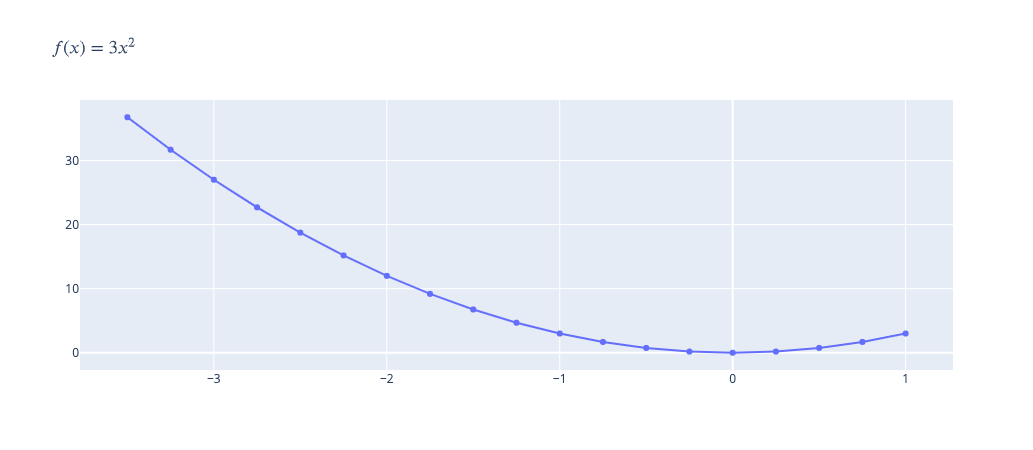

In [48]:
import plotly.graph_objects as go
f_of_x = go.Scatter(x=vals, y=[f(val) for val in vals])
three_x_2 = go.Figure(f_of_x, layout = {'title': r'$f(x)  = 3x^2$'})

three_x_2

### Finding the rate of change

Now remember that our task with training our a neural network, is to repeatedly find the slope of a function at a given value.  So let's move onto that.  

First, the shorthand to say that we are calculating the slope of a function $f$ is to write $f'$ as in:

$f'(-3) = -18$

> Notice, this is different than the *output* of our function at $-3$, which is $f(-3) = 27$.

Ok, so now let's see if we can calculate the slope of our function.  First, remember that when we say the slope of the function, what we really mean is the how much our function's output changes as the input changes.  Or, perhaps even more simply, rise over run.  Let's start there.

> **Rise over run**
* Pick two points, $x_0$ and $x_1$.
* Rise over run is the change in output divided by change in input.

$rate\_of\_change = rise\_over\_run =  \frac{\Delta y}{\Delta x} = \frac{y_1 - y_0}{x_1 - x_0}$

> The $\Delta y$, pronounced delta $y$, just means change in $y$, and is the difference in $y$ between two points.

Now let's see this in action.  We start by using our formula for the rate of change above applied to $f(x) = 3 $.  We choose any two values for $x_0$ and $x_1$, and then find the corresponding outputs for those values.  

> Below we let $x_0 = -3$ and $x_1 = -2$.

In [75]:
def f(x): 
    return 3*(x**2)

x_0 = -3
x_1 = -2

y_0 = f(-3) # 27

y_1 = f(-2) # 12

Then we use our formula: $rate\_of\_change = \frac{y_1 - y_0}{x_1 - x_0}$

In [76]:
rate_of_change_of_f = (y_1 - y_0)/(x_1 - x_0) # (12 - 27)/(-2 - (-3)) = -15/1
rate_of_change_of_f # -15.0

-15.0

### Moving to the derivative

Now there is a flaw in our approach above.  Let's look at our plot again.

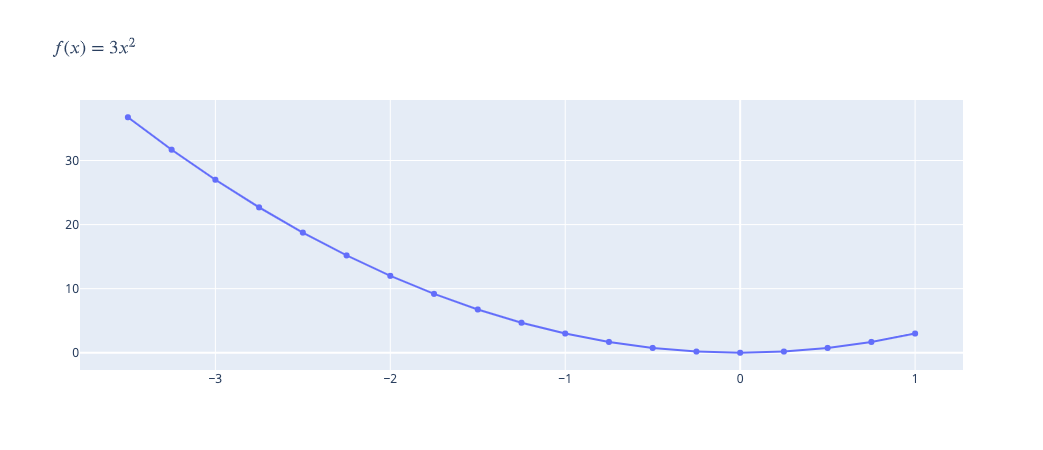

In [70]:
three_x_2

Remember that we were trying to calculate the slope of our function at precisely the value $-3$.  But we did this by calculating the slope over the range $x = -3$ to $x = -2$.  Do you the issue?  The problem is that even in that range of one unit, the slope is changing.  So the rise over run from -3 to -2, is different from the rise over run from -3 to -2.5.  And remember we want to find the rate of change at *precisely* -3.  Or in other words, how does our output change if we just *nudge* our input at -3.  

So see what happens if we change our $\Delta x$.  First we'll write our rate of change formula to be the following:

In [71]:
def rate_of_change(x_0, x_1):
    return (f(x_1) - f(x_0))/(x_1 - x_0)

And notice what happens as we make `delta_x` smaller and smaller.

In [72]:
rate_of_change(-3, -2) # delta x = 1

-15.0

In [78]:
rate_of_change(-3, -2.9) # delta x = .1

-17.69999999999998

In [79]:
rate_of_change(-3, -2.99) # delta x = .01

-17.97000000000007

As we see above, our rate of change actually does emerge as our $\Delta x$ gets smaller and smaller.  Or in other words we can find the rate of change as the difference between $x_1$ and $x_0$ approaches zero.

This is the derivative.

> The **derivative** is the *instantaneous* rate of change of a function.  

Or to place it mathematically, we say:

$\frac{\delta y}{\delta x} = lim_{\delta x\to0}\frac{y_1 - y_0}{x_1 - x_0}$.

So this is really what the derivative is.  

This may seem like a lot of math, but is really a restatement of our previous definition.

> The **derivative of a function** is the change in the output of that function, per a change in $x$, as our *change in $x$* approaches zero.

> We can read $\frac{\delta y}{\delta x}$ as delta $y$ over delta $x$.

> We can read $lim_{\delta x\to0}$ as the limit as the change in $x$ approaches 0.

### Summary

In this lesson, we covered a couple of mathematical ideas.  The first was how to express evaluating a function at a given value.  For example, given our function:

$f(x) = 3x^2$

If we want to write the output of $f$ when $x = 4$, we can write this as $f(4)$, and then to calculate it we just plug in $4$ wherever we see $x$:

$f(4) = 3*x^2 = 3*4^2 = 3*16 = 48$

Now, for our gradient descent formula, we don't need to just calculate the *output* of a function at a given value, but how our function changes as we nudge the input of our function.  Remember, that we want to calculate this to get a sense of how much we should change the parameter values of our neural network to change the output of our cost function.

In other words we want to calculate the *rate of change* of our function at a given value.  Our formula for the rate of change of a function is the following:

$rate\_of\_change = rise\_over\_run =  \frac{\Delta y}{\Delta x} = \frac{y_1 - y_0}{x_1 - x_0}$

And we then saw, that really what we want is the *instantaneous rate of change* of a function - that is how much the output of our function changes, as our delta x approaches 0.  And we write this as the following:

$\frac{\delta y}{\delta x} = lim_{\delta x\to0}\frac{y_1 - y_0}{x_1 - x_0}$.